<a href="https://colab.research.google.com/github/aDhiTthYAN/Carbon-Emissions-Impact-Analysis/blob/main/Carbon_Emissions_Impact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
temperature_data = pd.read_csv('/content/temperature.csv')
co2_data = pd.read_csv('/content/carbon_emmission.csv')

In [3]:
temperature_data.head()

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [4]:
co2_data.head()

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86


In [5]:

temperature_data.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'F1961', 'F1962', 'F1963',
       'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970', 'F1971',
       'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978', 'F1979',
       'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987',
       'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995',
       'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003',
       'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011',
       'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019',
       'F2020', 'F2021', 'F2022'],
      dtype='object')

In [6]:
temperature_values = temperature_data.filter(regex='^F').stack() # extracting all year columns
temperature_values

0    F1961   -0.113
     F1962   -0.164
     F1963    0.847
     F1964   -0.764
     F1965   -0.244
              ...  
224  F2018    0.453
     F2019    0.925
     F2020    0.389
     F2021   -0.125
     F2022   -0.490
Length: 12460, dtype: float64

In [7]:
temperature_stats = {
    "Mean": round(float(temperature_values.mean()),3),
    "Median": round(float(temperature_values.median()),3),
    "Variance": round(float(temperature_values.var()),3)
}
temperature_stats

{'Mean': 0.538, 'Median': 0.47, 'Variance': 0.429}

 *  Mean = 0.538 → on average, temperature anomalies are 0.538°C above baseline.

* Median = 0.47 → half of anomalies are below 0.47°C, half above.


* Variance = 0.429 → measures how spread out the anomalies are around the mean.
(Variance measures: on average, how far are the other points from this mean?)

**Findings** → Low varaince 0.429 so values are clustered around the mean, there is some fluctuations but it is not that high

**Findings2**  →   Mean = 0.538, Median = 0.47 → Mean > Median

1.  This indicates slightly positively skewed data (right-skewed).

 (Positive skew: tail on the right → many small values, some very large values.

 Negative skew: tail on the left → many large values, some very small values.)

2.  Trend interpretation: Overall temperature anomalies are increasing slightly → Earth is getting warmer.




In [8]:
co2_values = co2_data['Value']
co2_stats ={
     "Mean": round(float(co2_values.mean()),3),
    "Median": round(float(co2_values.median()),3),
    "Variance": round(float(co2_values.var()),3)
}
co2_stats

{'Mean': 180.716, 'Median': 313.835, 'Variance': 32600.002}

*  Mean < Median → Left-skewed distribution
*  Variance is very high → CO₂ concentrations have drastically increased over decades
*  Trend interpretation:
   1.  CO₂ levels are rising globally → clear anthropogenic impact.
   2.  Mean, median, and high variance confirm that CO₂ levels are rising steadily over time, with bigger fluctuations than temperature anomalies.

In [9]:
import plotly.graph_objects as go
import plotly.express as px

# extracting time-series data for plotting
# temperature: averaging across countries for each year
temperature_years = temperature_data.filter(regex='^F').mean(axis=0)
temperature_years.index = temperature_years.index.str.replace('F','').astype(int)

#co2
co2_data['Year']  = co2_data['Date'].str[:4].astype(int)
co2_yearly = co2_data.groupby('Year') ['Value'].mean()



In [10]:
temperature_years

,0
1961,0.163053
1962,-0.013476
1963,-0.006043
1964,-0.070059
1965,-0.247027
...,...
2018,1.302113
2019,1.443061
2020,1.552038
2021,1.343531


In [11]:
co2_yearly

,Value
Year,
1958,315.232000
1959,172.460455
1960,158.601667
1961,158.938333
1962,159.355000
...,...
2020,207.416667
2021,208.472083
2022,209.518333


In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=temperature_years.index, y=temperature_years.values,
    mode='lines+markers',name='Temperature Change (degree celsius)'

))
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=temperature_years.index, y=temperature_years.values,
    mode='lines+markers',name='Temperature Change (degree celsius)'

))
fig.add_trace(go.Scatter(
    x=co2_yearly.index, y=co2_yearly.values,
    mode='lines+markers', name="CO₂ Concentration (ppm)", line=dict(dash='dash')
))
fig.update_layout(
    title="Time-series of Temperature Change and CO₂ Concentrations",
    xaxis_title="Year",
    yaxis_title="Values",
    template="plotly_white",
    legend_title="Metrics"
)
fig.show()

* CO₂ concentration is steadily rising, while temperature anomalies are increasing more slowly.

* We can visually see the correlation: when CO₂ rises, temperature also tends to rise.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:


temperature_years

,0
1961,0.163053
1962,-0.013476
1963,-0.006043
1964,-0.070059
1965,-0.247027
...,...
2018,1.302113
2019,1.443061
2020,1.552038
2021,1.343531


In [16]:
merged_data = pd.DataFrame({
    "Temperature Change" : temperature_years,
    "Co2 Concentration"  : co2_yearly
}).dropna()
merged_data.isnull().value_counts()

,,count
Temperature Change,Co2 Concentration,
False,False,62


In [17]:
merged_data

,Temperature Change,Co2 Concentration
1961,0.163053,158.938333
1962,-0.013476,159.355000
1963,-0.006043,159.580417
1964,-0.070059,159.905833
1965,-0.247027,160.083333
...,...,...
2018,1.302113,204.598750
2019,1.443061,206.183333
2020,1.552038,207.416667
2021,1.343531,208.472083


In [18]:
correlation=merged_data.corr()
correlation

,Temperature Change,Co2 Concentration
Temperature Change,1.000000,0.955428
Co2 Concentration,0.955428,1.000000


<Axes: >

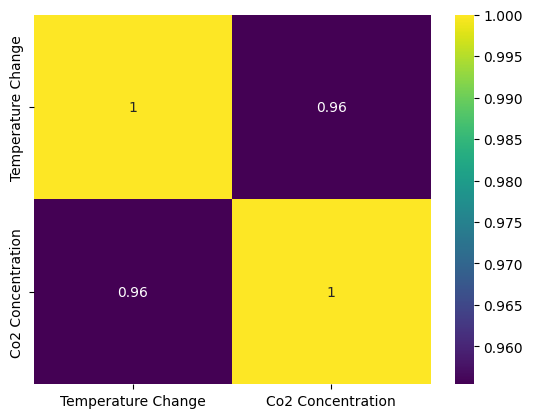

In [19]:
sns.heatmap(merged_data.corr(),annot=True,cmap='viridis')

*  As CO₂ levels increase, temperature anomalies also increase.

* The relationship is strong and linear, meaning temperature and CO₂ tend to move together consistently over time.

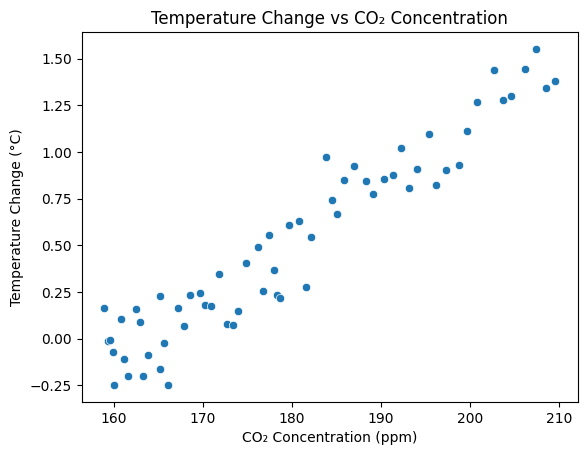

In [20]:
sns.scatterplot(
    x="Co2 Concentration",y="Temperature Change",data=merged_data)
plt.title("Temperature Change vs CO₂ Concentration")
plt.xlabel("CO₂ Concentration (ppm)")
plt.ylabel("Temperature Change (°C)")
plt.show()


*  Scatter plot shows a clear increase in the trend when Co2 increase Temperature also increases

In [21]:
temperature_years.index

Index([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022],
      dtype='int64')

In [22]:
co2_yearly

,Value
Year,
1958,315.232000
1959,172.460455
1960,158.601667
1961,158.938333
1962,159.355000
...,...
2020,207.416667
2021,208.472083
2022,209.518333


In [23]:
co2_data

,ObjectId,Country,Date,Value,Year
0,1,World,1958M03,315.70,1958
1,2,World,1958M04,317.45,1958
2,3,World,1958M05,317.51,1958
3,4,World,1958M06,317.24,1958
4,5,World,1958M07,315.86,1958
...,...,...,...,...,...
1565,1566,World,2023M11,0.72,2023
1566,1567,World,2023M12,421.86,2023
1567,1568,World,2023M12,0.68,2023
1568,1569,World,2024M01,0.68,2024


In [24]:
from scipy.stats import linregress

temp_trend = linregress(temperature_years.index,temperature_years.values)


In [25]:
slope=round(float(temp_trend.slope),4)
slope

0.0262

*  Slope meaning: The climate change rate per year (°C/year, ppm/year).

In [26]:
round(float(temp_trend.intercept),4)

-51.6044

* Intercept meaning: Baseline value (not very important here, more of a technical necessity).

In [27]:
from scipy.stats import linregress

# temperature trend
temp_trend = linregress(temperature_years.index, temperature_years.values)
temp_trend_line = temp_trend.slope * temperature_years.index + temp_trend.intercept

# CO2 trend
co2_trend = linregress(co2_yearly.index, co2_yearly.values)
co2_trend_line = co2_trend.slope * co2_yearly.index + co2_trend.intercept
fig_trends = go.Figure()

fig_trends.add_trace(go.Scatter(
    x=temperature_years.index, y=temperature_years.values,
    mode='lines+markers', name="Temperature Change (°C)"
))
fig_trends.add_trace(go.Scatter(
    x=temperature_years.index, y=temp_trend_line,
    mode='lines', name=f"Temperature Trend (Slope: {slope})", line=dict(dash='dash')
))
fig_trends.add_trace(go.Scatter(
    x=co2_yearly.index, y=co2_yearly.values,
    mode='lines+markers', name="CO₂ Concentration (ppm)"
))
fig_trends.add_trace(go.Scatter(
    x=co2_yearly.index, y=co2_trend_line,
    mode='lines', name=f"CO₂ Trend (Slope: {round(float(co2_trend.slope),4)})", line=dict(dash='dash')
))
fig_trends.update_layout(
    title="Trends in Temperature Change and CO₂ Concentrations",
    xaxis_title="Year",
    yaxis_title="Values",
    template="plotly_white",
    legend_title="Metrics"
)
fig_trends.show()


The graph shows the linear trends in both temperature change and CO₂ concentrations over time, represented by their respective slopes. The CO₂ trend has a much steeper slope (0.32) compared to temperature (0.03), which indicates a faster rate of increase in CO₂ emissions relative to temperature change. This suggests that while CO₂ levels are rising rapidly, the temperature impact, though slower, is accumulating steadily and may have long-term consequences.

In [28]:
#seasonal variation
co2_data['Month'] = co2_data['Date'].str[-2:].astype(int)
co2_monthly =co2_data.groupby('Month')['Value'].mean()

fig_seasonal=px.line(
    co2_monthly,
    x=co2_monthly.index,
    y=co2_monthly.values,
    labels={"x":"Month","y":"Co2 Concentration"},
    title='Seasonal Variations in co2 Concentration',
    markers=True
)
fig_seasonal.update_layout(
    xaxis=dict(tickmode="array", tickvals=list(range(1, 13)))
)
fig_seasonal.show()

The above graph highlights the seasonal fluctuations in CO₂ concentrations, which peak during late spring and early summer (around May) and reach the lowest levels in fall (around September). These variations are likely due to natural processes such as plant photosynthesis, which absorbs CO₂ during the growing season, and respiration, which releases CO₂ in the off-season. This seasonal cycle underscores the role of natural carbon sinks in moderating atmospheric CO₂ levels.

In [29]:
print("Correlation matrix (pearson):")
print(merged_data[["Co2 Concentration",'Temperature Change']].corr(method='pearson'))
print("\nCorrelaation matrix (Spearman):")
print(merged_data[['Co2 Concentration','Temperature Change']].corr(method='spearman'))

Correlation matrix (pearson):
                    Co2 Concentration  Temperature Change
Co2 Concentration            1.000000            0.955428
Temperature Change           0.955428            1.000000

Correlaation matrix (Spearman):
                    Co2 Concentration  Temperature Change
Co2 Concentration            1.000000            0.937901
Temperature Change           0.937901            1.000000


Two correlation tests confirm the strength of the relationship:

* Pearson Correlation (0.955): Very strong linear relationship. This means as CO₂ concentration rises, temperature change rises almost proportionally.

* Spearman Correlation (0.938): Very strong rank-based relationship. Even if the exact increases aren’t perfectly linear, the overall upward trend remains consistent.

👉 Both results reinforce that higher CO₂ concentrations are strongly associated with higher temperature anomalies, regardless of whether the relationship is measured linearly (Pearson) or by rank order (Spearman).

<Axes: xlabel='Co2 Concentration', ylabel='Temperature Change'>

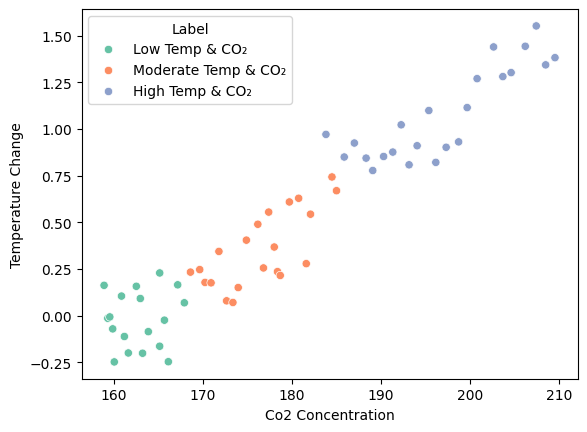

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clustering_data = merged_data[['Temperature Change','Co2 Concentration']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # assuming 3 clusters for simplicity
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

clustering_data['Label'] = clustering_data['Cluster'].map({
    0: 'Moderate Temp & CO₂',
    1: 'High Temp & CO₂',
    2: 'Low Temp & CO₂'
})

sns.scatterplot(
    data=clustering_data,
    x='Co2 Concentration',
    y="Temperature Change",
    hue="Label",
    palette="Set2"
)

The scatter plot groups the years into three clusters using K-Means:

* Low Temp & CO₂ (green): Early years with relatively low CO₂ concentrations and low temperature changes.

* Moderate Temp & CO₂ (orange): Transition period where both CO₂ and temperature anomalies are rising.

* High Temp & CO₂ (blue): Recent years characterized by high CO₂ concentrations and strong temperature increases.

👉 This clustering clearly shows the progression of climate patterns over time, with data points shifting from low → moderate → high categories, highlighting the link between rising CO₂ levels and increasing temperatures.

In [31]:
print(merged_data.columns)


Index(['Temperature Change', 'Co2 Concentration'], dtype='object')


In [34]:
from sklearn.linear_model import LinearRegression

x = merged_data[['Co2 Concentration']].values
y =merged_data['Temperature Change'].values

model = LinearRegression()
model.fit(x,y)

def simulate_temperature_change(co2_percentage_change):
  current_mean_co2 = merged_data['Co2 Concentration'].mean()
  new_co2 = current_mean_co2 * (1+co2_percentage_change/100)

  predicted_temp = model.predict([[new_co2]])
  return predicted_temp[0]

scenarios = {
    "Increase CO₂ by 10%": round(float(simulate_temperature_change(10)),4),
    "Decrease CO₂ by 10%": round(float(simulate_temperature_change(-10)),4),
    "Increase CO₂ by 20%": round(float(simulate_temperature_change(20)),4),
    "Decrease CO₂ by 20%": round(float(simulate_temperature_change(-20)),4),
}

scenarios

{'Increase CO₂ by 10%': 1.0866,
 'Decrease CO₂ by 10%': -0.06,
 'Increase CO₂ by 20%': 1.66,
 'Decrease CO₂ by 20%': -0.6333}

Using a simple Linear Regression model, we simulated how changes in CO₂ might affect global temperatures:

* Increase CO₂ by 10% → +1.09°C temperature anomaly

* Decrease CO₂ by 10% → -0.06°C temperature anomaly

* Increase CO₂ by 20% → +1.66°C temperature anomaly

* Decrease CO₂ by 20% → -0.63°C temperature anomaly

👉 These results show the sensitivity of temperature change to CO₂ levels. Even modest increases in CO₂ concentrations lead to noticeable warming, while reductions could help slow down or even reverse warming trends.

In [48]:
predict = round(simulate_temperature_change(int(input("Enter a number: "))), 4)
print(predict)


Enter a number: 50
3.3799
